## **KPI Rule-based Segmentation**

Lead Calculation with Rule-Based Classification
* A game company wants to create level-based new customer definitions (personas) by using some features of its customers,
* and to create segments according to these new customer definitions
* and to estimate how much the new customers can earn on average according to these segments.
* It is desired to determine how much a 25-year-old male user from Turkey, who is an IOS user, can earn on average.

* The purchases.csv dataset contains the prices of the products sold by an international game company
* The users.csv contains some demographic information of the users who buy these products.
* The data set consists of records created in each sales transaction. This means that the table is not deduplicated.
* In other words, a user with certain demographic characteristics may have made more than one purchase.

In [1]:
import pandas as pd
import numpy as np
import ipychart as ipc

In [2]:
users = pd.read_csv('users.csv')
users.head()

,uid,reg_date,device,gender,country,age
0,54030035,2017-06-29T00:00:00Z,and,M,USA,19
1,72574201,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,64187558,2016-02-07T00:00:00Z,iOS,M,USA,16
3,92513925,2017-05-25T00:00:00Z,and,M,BRA,41
4,99231338,2017-03-26T00:00:00Z,iOS,M,FRA,59


In [3]:
users.describe()

,uid,age
count,1.000000e+04,10000.000000
mean,5.580304e+07,24.399200
std,2.562174e+07,9.772512
min,1.111609e+07,15.000000
25%,3.392627e+07,17.000000
50%,5.627628e+07,21.000000
75%,7.786440e+07,28.000000
max,9.999648e+07,84.000000


In [4]:
purchases = pd.read_csv('purchases.csv')
purchases.head()

,date,uid,price
0,2017-07-10,41195147,499
1,2017-07-15,41195147,499
2,2017-11-12,41195147,599
3,2017-09-26,91591874,299
4,2017-12-01,91591874,599


In [5]:
df1 = purchases.merge(users, how='inner', on='uid')
df1.head()

,date,uid,price,reg_date,device,gender,country,age
0,2017-07-10,41195147,499,2017-06-26T00:00:00Z,and,M,BRA,17
1,2017-07-15,41195147,499,2017-06-26T00:00:00Z,and,M,BRA,17
2,2017-11-12,41195147,599,2017-06-26T00:00:00Z,and,M,BRA,17
3,2017-09-26,91591874,299,2017-01-05T00:00:00Z,and,M,TUR,17
4,2017-12-01,91591874,599,2017-01-05T00:00:00Z,and,M,TUR,17


In [24]:
df1['country'].unique()

array(['BRA', 'TUR', 'USA', 'CAN', 'DEU', 'FRA'], dtype=object)

In [6]:
agg_df = df1.groupby(by=["country", 'device', "gender", "age"]).agg({"price": "sum"}).sort_values("price", ascending=False)
agg_df.head()

price
country device gender age       
USA     and    M      15   61550
BRA     and    M      19   45392
DEU     iOS    F      16   41602
USA     and    F      17   40004
               M      23   39802

In [7]:
agg_df = agg_df.reset_index()
agg_df.head()

,country,device,gender,age,price
0,USA,and,M,15,61550
1,BRA,and,M,19,45392
2,DEU,iOS,F,16,41602
3,USA,and,F,17,40004
4,USA,and,M,23,39802


In [8]:
bins = [0, 19, 24, 31, 41, agg_df["age"].max()]

In [9]:
# New bins
nbins = [0, 16, 21, 30, 40, 50, users["age"].max()]

In [10]:
mylabels = ['0_18', '19_23', '24_30', '31_40', '41_' + str(users["age"].max())]

In [12]:
agg_df["age_cat"] = pd.cut(agg_df["age"], bins, labels=mylabels)
agg_df.head()

,country,device,gender,age,price,age_cat
0,USA,and,M,15,61550,0_18
1,BRA,and,M,19,45392,0_18
2,DEU,iOS,F,16,41602,0_18
3,USA,and,F,17,40004,0_18
4,USA,and,M,23,39802,19_23


In [23]:
agg_df.columns

Index(['customers_level_based', 'price', 'segment'], dtype='object')

#### New age categories

In [11]:
# New labels
nlabels = ['0_16', '17_21', '22_30', '31_40', '41_50', '51_'+str(users["age"].max())]

In [13]:
# New version
agg_df["age_cat"] = pd.cut(agg_df["age"], nbins, labels=nlabels)
agg_df.head()

,country,device,gender,age,price,age_cat
0,USA,and,M,15,61550,0_16
1,BRA,and,M,19,45392,17_21
2,DEU,iOS,F,16,41602,0_16
3,USA,and,F,17,40004,17_21
4,USA,and,M,23,39802,22_30


In [14]:
agg_df["customers_level_based"] = [row[0] + "_" + row[1].upper() + "_" + row[2] + "_" + row[5] for row in agg_df.values]
agg_df.head()

,country,device,gender,age,price,age_cat,customers_level_based
0,USA,and,M,15,61550,0_16,USA_AND_M_0_16
1,BRA,and,M,19,45392,17_21,BRA_AND_M_17_21
2,DEU,iOS,F,16,41602,0_16,DEU_IOS_F_0_16
3,USA,and,F,17,40004,17_21,USA_AND_F_17_21
4,USA,and,M,23,39802,22_30,USA_AND_M_22_30


In [15]:
agg_df = agg_df[["customers_level_based", "price"]]
agg_df.head()

,customers_level_based,price
0,USA_AND_M_0_16,61550
1,BRA_AND_M_17_21,45392
2,DEU_IOS_F_0_16,41602
3,USA_AND_F_17_21,40004
4,USA_AND_M_22_30,39802


In [16]:
agg_df = agg_df.groupby("customers_level_based").agg({"price": "mean"})
agg_df.head()

,price
customers_level_based,
BRA_AND_F_0_16,32721.500000
BRA_AND_F_17_21,21068.400000
BRA_AND_F_22_30,11327.333333
BRA_AND_F_31_40,8354.750000
BRA_AND_F_41_50,4664.500000


In [17]:
agg_df = agg_df.reset_index()
agg_df.head()

,customers_level_based,price
0,BRA_AND_F_0_16,32721.500000
1,BRA_AND_F_17_21,21068.400000
2,BRA_AND_F_22_30,11327.333333
3,BRA_AND_F_31_40,8354.750000
4,BRA_AND_F_41_50,4664.500000


### User segements:
* 33 y/o female, USA, android user
* 25 y/o male, Turkey, iOS user
* 12 y/o female, Germany, iOS user
* 19 y/o male, Canada, android user


In [49]:
agg_df["segment"] = pd.qcut(agg_df["price"], 4, labels=["D", "C", "B", "A"])
users = ["TUR_IOS_M_22_30","USA_AND_F_31_40","DEU_IOS_F_0_16","CAN_AND_M_17_21"]

In [62]:
comparison = agg_df.loc[agg_df['customers_level_based'].isin(users)].sort_values(ascending=False, by='price')
comparison

,customers_level_based,price,segment
53,DEU_IOS_F_0_16,31126.0,A
30,CAN_AND_M_17_21,7284.5,B
106,USA_AND_F_31_40,5561.0,B
100,TUR_IOS_M_22_30,2792.5,C


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([0, 1, 2, 3]),
 [Text(0, 0, 'DEU_IOS_F_0_16'),
  Text(1, 0, 'CAN_AND_M_17_21'),
  Text(2, 0, 'USA_AND_F_31_40'),
  Text(3, 0, 'TUR_IOS_M_22_30')])

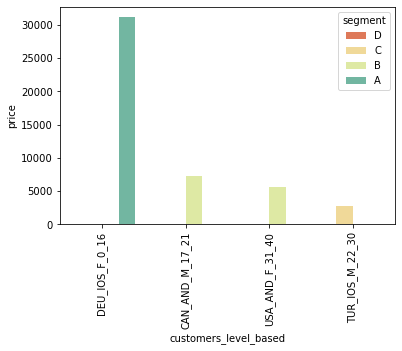

In [63]:
sns.barplot(x='customers_level_based', y='price',hue='segment',data=comparison, palette='Spectral')
plt.xticks(rotation=90)